# Model Evaluation

## Review of last class

- Goal was to predict the species of an **unknown iris**
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [11]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [3]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [4]:
# b to create new block, enter to go into that block, control enter to execute entire block
X.shape

(150, 4)

In [5]:
# store response vector in "y"
y = iris.species_num

### KNN (K=50)

In [15]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# store the predicted response values
y_pred = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions (reward function)
- **Classification error**: percentage of incorrect predictions (loss function)

In this case, we'll use classification accuracy.

In [17]:
# compute classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.94


This is known as **training accuracy** because we are testing the model on the same data we used to train the model.

![50NN classification map](images/iris_50nn_map.png)

### KNN (K=1)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


Does that mean that K=1 is the best value for K?

![1NN classification map](images/iris_01nn_map.png)

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

### Side note on "unpacking"

In [33]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]

In [34]:
min_and_max = min_max([1, 2, 3])
print min_and_max
print type(min_and_max)

[1, 3]
<type 'list'>


In [35]:
the_min, the_max = min_max([1, 2, 3])
print the_min
print type(the_min)
print the_max
print type(the_max)

1
<type 'int'>
3
<type 'int'>


### Understanding the `train_test_split` function

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [39]:
# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(150, 4)
(90, 4)
(60, 4)


In [31]:
# before splitting
print y.shape

# after splitting
print y_train.shape
print y_test.shape

(150,)
(90,)
(60,)


![train_test_split](images/train_test_split.png)

What does this accomplish?

- Model will be trained and tested on **different data** (we treat testing data like out-of-sample data)
- Response values are **known** for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

### Using the train/test split procedure (K=1)

In [41]:
# STEP 1: split X and y into training and testing sets (using random_state parameter for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
# random state = 4 just means that 
# stratified sampling produces reliable results for train test split
X_train[0]

array([ 4.6,  3.4,  1.4,  0.3])

In [43]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# fitting on training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [44]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
# make predictions on test set
print metrics.accuracy_score(y_test, y_pred)
# compare true values of test set with predictions made based on training set

0.95


### Repeat for K=50

In [45]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.933333333333


![Bias-variance tradeoff](images/bias_variance.png)

### Search for the "best" value of K

In [46]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
k_range = range(1, 51)
training_error = []
testing_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # training error
    knn.fit(X, y)
    y_pred = knn.predict(X)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
    # to get error, use 1 - 
    # testing error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

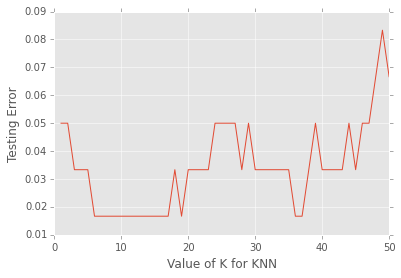

In [47]:
%matplotlib inline
# allows plots to appear in the notebook

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot the relationship between K and TESTING ERROR
plt.plot(k_range, testing_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

What can we conclude?

- A value of K around 11 is likely the **best value for K** when using KNN on the iris dataset.
- When given the measurements of an **unknown iris**, we estimate that we would be able to correctly predict its species 98% of the time.

### Training error versus testing error

In [48]:
# create a DataFrame of K, training error, and testing error
df = pd.DataFrame({'K': k_range, 'train':training_error, 'test':testing_error}).set_index('K')
df.head()
# if you define index, then pandas will treat it as such and plot the other values in the df
# cute.

,test,train
K,,
1,0.050000,0.000000
2,0.050000,0.020000
3,0.033333,0.040000
4,0.033333,0.040000
5,0.033333,0.033333


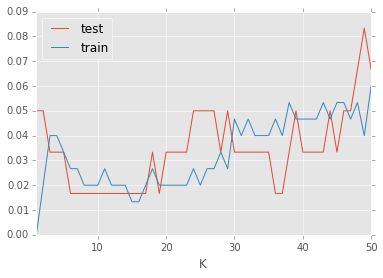

In [49]:
# plot the relationship between K and both TRAINING ERROR and TESTING ERROR
df.plot()

Roughly speaking:

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

![Bias-variance tradeoff](images/training_testing_error.png)

## Making predictions on out-of-sample data

Given the measurements of a (truly) unknown iris, how do we predict its species?

In [52]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# re-train the model with X and y (not X_train and y_train) - why?
# because we use the train_test_split proceedure to learn the optimal parameter, then train on all the data to get the most predictive model
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([3, 5, 4, 2])

array([1])

## Disadvantages of train/test split?

What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [55]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.933333333333


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**